## Comparing RF_right and RF_left during Squat

In [134]:
import kineticstoolkit as ktk
import numpy as np
import matplotlib.pyplot as plt

## Reading the c3d files

In [135]:
c3d_contents = ktk.read_c3d('Squat_2_0001.c3d', convert_point_unit=True)

## Extracting the EMG files from 'Analogs' TimeSeries

In [136]:
alg_info = c3d_contents["Analogs"]
emg_data = alg_info.data
rf_l = alg_info.get_subset(["EMG1_RectFem_L"])
rf_r = alg_info.get_subset(["EMG2_RectFem_R"])


## Filtering the EMG signal with bandpass filter with cut-off frequency 20 and 200 Hz

In [137]:
rfL_Filtered = ktk.filters.butter(rf_l, btype='bandpass', fc=[20, 200]) #The arguments are (signal_input, btype='bandpass', cut-off frequency)
rfR_Filtered = ktk.filters.butter(rf_r, btype='bandpass', fc=[20, 200])


## Rectifying the signal (eliminating the negative values)

In [138]:
rfL_Filtered.data["EMG1_RectFem_L"] = np.abs(rfL_Filtered.data["EMG1_RectFem_L"])
rfR_Filtered.data["EMG2_RectFem_R"] = np.abs(rfR_Filtered.data["EMG2_RectFem_R"])
# plt.plot(rfR_Filtered.data["EMG2_RectFem_R"],'b--')
# plt.plot(rfL_Filtered.data["EMG1_RectFem_L"], 'r-')

## Filter the signal again with low-pass filter with cut-off frequency of 20 Hz

In [139]:
rfL_Filtered = ktk.filters.butter(rfL_Filtered, fc=20)
rfR_Filtered = ktk.filters.butter(rfR_Filtered, fc=20)
rfL_Filtered = rfL_Filtered.rename_data("EMG1_RectFem_L", "Envelope")
rfR_Filtered = rfR_Filtered.rename_data("EMG2_RectFem_R", "Envelope")
rfL_comb = rf_l.merge(rfL_Filtered)
rfR_comb = rf_r.merge(rfR_Filtered)

## Trying Resample

In [140]:
rfL_comb.data["Resample"] = rfL_comb.resample(100.0)
rfR_comb.data["Resample"] = rfR_comb.resample(100.0)


## We compare the envelope signal between the right and left

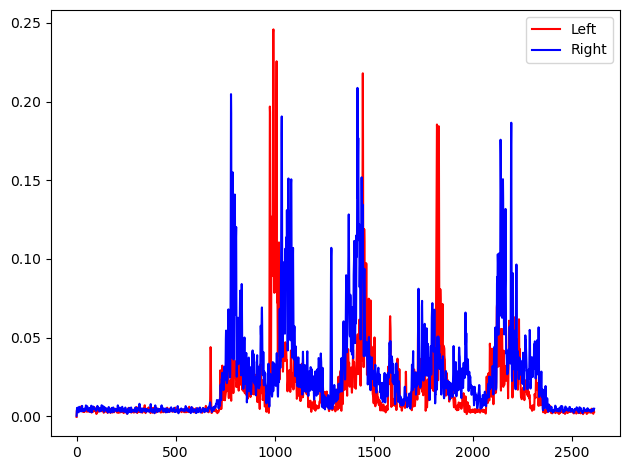

In [145]:
plt.plot(rfL_comb.data["Resample"].data["Envelope"], 'r-', label='Left')
plt.plot(rfR_comb.data["Resample"].data["Envelope"], 'b-', label='Right')
plt.legend()
plt.tight_layout()
